In [57]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_biclusters

In [34]:
data = make_biclusters(shape=(1000,2), n_clusters=2, noise=50)

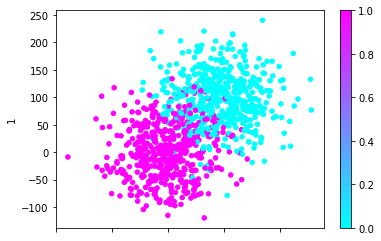

In [58]:
pd.DataFrame(data[0]).plot(x=0,y=1,kind='scatter', c=data[1][1]*1, cmap='cool')
plt.show()

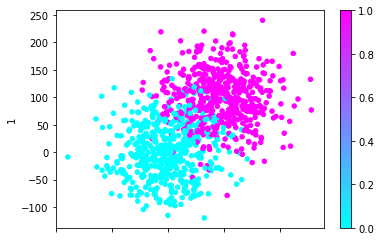

In [85]:
pd.DataFrame(data[0]).plot(x=0,y=1,kind='scatter', c=data[1][0]*1, cmap='cool')
plt.show()

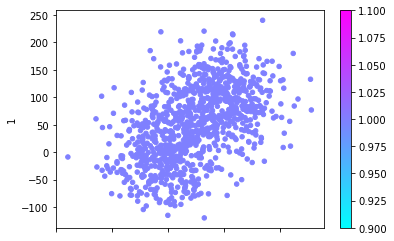

In [84]:
pd.DataFrame(data[0]).plot(x=0,y=1,kind='scatter', c=data[1][0]+data[1][1], cmap='cool')
plt.show()

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [86]:
X = preprocessing.normalize(data[0] ,axis=0)  
y = data[1].transpose()

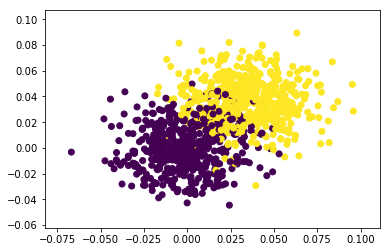

In [88]:
plt.scatter(x = X[:,0], y = X[:,1], c = y[:,0])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [190]:
nn = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', learning_rate_init=0.05, max_iter=1, warm_start=True)

0.0


/Users/zackakil/anaconda/envs/dev/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


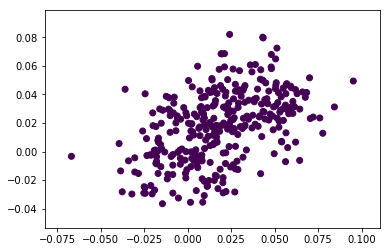

0.515151515152


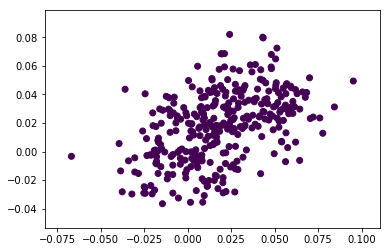

0.00606060606061


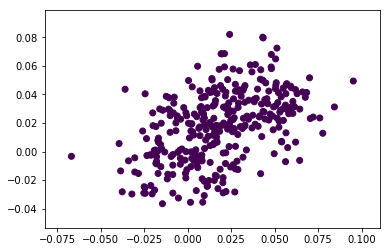

0.515151515152


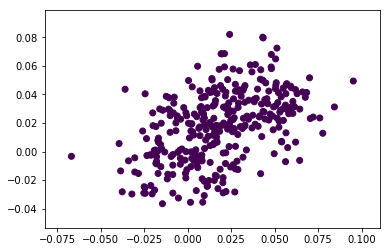

0.530303030303


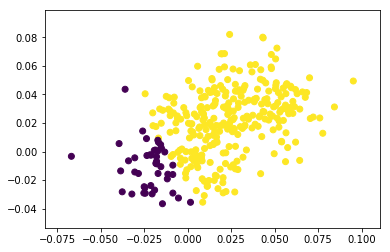

0.515151515152


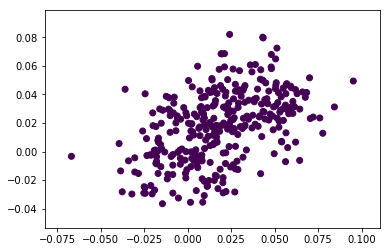

0.515151515152


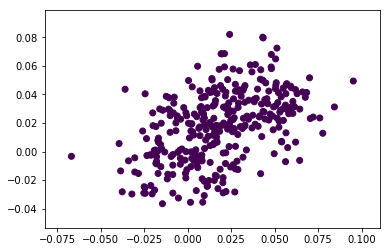

0.515151515152


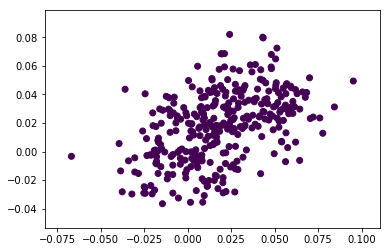

0.848484848485


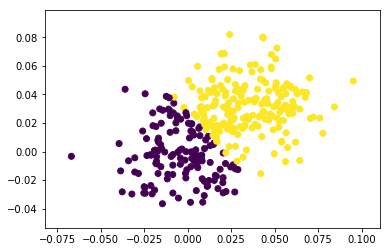

0.548484848485


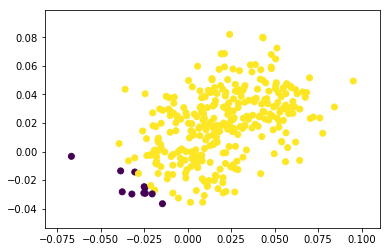

In [191]:
for i in range(10):
    nn.fit(X_train, y_train)
    print(nn.score(X_test, y_test))
    plt.scatter(x = X_test[:,0], y = X_test[:,1], c = nn.predict(X_test)[:,0])
    plt.figure(1)
    plt.show()